In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

# Sources: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
# https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%206.ipynb?fbclid=IwAR3BmLhi9pV5LYn0-UsOsnyuh3KI3u5YMPPBv6A_J97OEquCq3irsFCZslc

# Import hitters data
pdData = pd.read_csv("hitters.csv", index_col=0).dropna()
pdData.index.name = 'Player'
pdData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [2]:
# Removing Salary and the following three: League, Division and Newleague, as these contain letters.
xData_ = pdData.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Converting the strings to numbers in the columns League, Devision and NewLeague, as it is not possible to fit letters.
dummies = pd.get_dummies(pdData[['League', 'Division', 'NewLeague']])
xData = pd.concat([xData_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# The y-values is just the salaries
yData = pdData.Salary

xData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


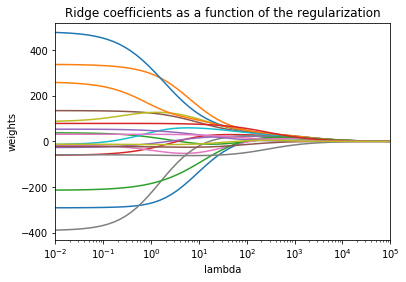

In [5]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import scale 

ridge = Ridge()
parameters = {'lambda': 10**np.linspace(10, -2, 100)}
# print(parameters)
# ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)

coefs = []

for a in parameters['lambda']:
    ridge.set_params(alpha=a)
    ridge.fit(scale(xData), yData)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(parameters['lambda'], coefs)
ax.set_xscale('log')
ax.set_xlim(0.01,100000)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

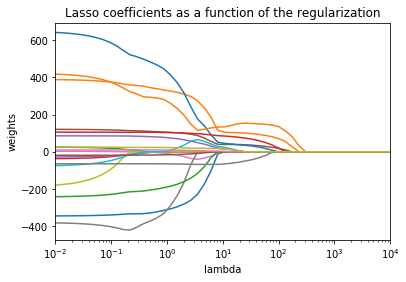

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Creating test and training sets. The training set will be an 80 % subset of the data.
# That makes the training data the first 210 rows, and the test data the last 53 rows. 
# The bias in this approach can be discussed, as the rows are sorted alphabetically after the players' first names.
# The alternative would be to save the subsets in files, as it must be the same subset used every time the code is run.

x_train=xData[0:210]
x_test=xData[211:263]
y_train=yData[0:210]
y_test=yData[211:263]

lasso = Lasso(max_iter=10000)
coefs = []

for a in parameters['lambda']:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(parameters['lambda'], coefs)
ax.set_xscale('log')
ax.set_xlim(0.01,10000)
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');


# scaler = StandardScaler().fit(x_train)

# ridge2 = Ridge(alpha=len(xData_)*11498/2)
# ridge2.fit(scaler.transform(x_train), y_train)
# pred = ridge2.predict(scaler.transform(x_test))
# mean_squared_error(y_test, pred)

In [11]:
print(ridge.coef_)
print(lasso.coef_)

[-290.91872754  337.22990996   37.49541895  -60.0177903   -26.66537481
  134.92804479  -17.05182407 -388.77784858   88.58058789  -12.89899389
  477.60102936  258.38771248 -213.37898996   78.76148229   53.65671708
  -22.19265284   31.25460079  -58.44382405  -12.38497384]
[-344.3818879   387.57036316   24.82080849  -36.82885869  -27.61936534
  120.41149568    2.75808615 -381.72454342 -179.15657011  -74.34127111
  640.78305079  416.96549204 -241.10636961  105.33642662   85.55946817
  -18.6348895     9.28036209  -64.39740483   25.4512665 ]
